In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
df = pd.read_csv('Live.csv')

In [20]:
df.shape

(7050, 16)

In [21]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [22]:
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace = True)

In [23]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   int64 
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 661.1+ KB


In [25]:
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [26]:
df.drop(['status_id', 'status_published'], axis = 1, inplace = True)

In [27]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [28]:
# Create X and y

X = df
y = df['status_type']

In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X['status_type'] = le.fit_transform(X['status_type'])

y = le.transform(y)



In [30]:
y

array([3, 1, 3, ..., 1, 1, 1])

In [39]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state= 0)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=0)

In [40]:
kmeans.cluster_centers_

array([[1.63846031e+00, 1.09297916e+02, 7.15312550e+01, 1.85350724e+01,
        1.01328137e+02, 6.83139812e+00, 5.55431843e-01, 3.45474789e-01,
        1.66852235e-01, 6.75998091e-02],
       [3.00000000e+00, 5.09069343e+02, 2.39053285e+03, 4.02281022e+02,
        3.87149635e+02, 1.04810219e+02, 8.78832117e+00, 6.10218978e+00,
        1.42700730e+00, 7.91970803e-01],
       [1.70022883e+00, 1.74479405e+03, 1.67249428e+02, 5.78192220e+01,
        1.71021968e+03, 2.61876430e+01, 6.59954233e+00, 1.34324943e+00,
        2.33409611e-01, 2.10526316e-01],
       [2.96153846e+00, 6.38653846e+02, 7.76728846e+03, 5.79557692e+02,
        4.91519231e+02, 1.27423077e+02, 5.88461538e+00, 9.21153846e+00,
        3.38461538e+00, 1.23076923e+00]])

In [41]:
labels = kmeans.labels_

labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

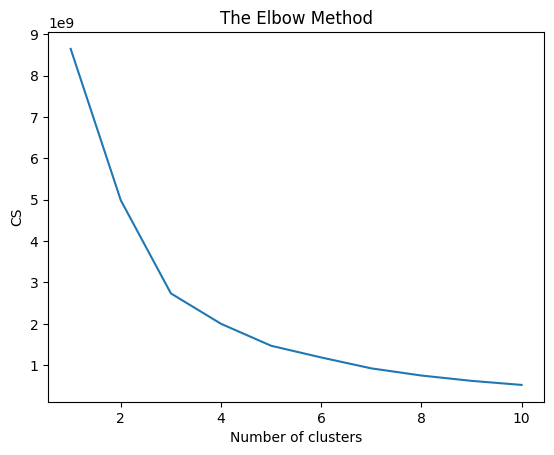

In [38]:
# use elbow method to find out the optimal number of cluster

from sklearn.cluster import KMeans

cs = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters =i, init = 'k-means++', max_iter= 300, n_init = 10, random_state = 0)
  kmeans.fit(X)
  cs.append(kmeans.inertia_)

plt.plot(range(1,11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()